In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import statsmodels.api as sm

%matplotlib inline
sns.set_style("darkgrid")


Bad key "text.kerning_factor" on line 4 in
/Users/Zhang/opt/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


# Question 2

## Part 1

In [2]:
spam = pd.read_csv('Data/spam.csv')
spam

,isuid,id,day of week,time of day,size.kb,box,domain,local,digits,name,...,special,credit,sucker,porn,chain,username,large text,spampct,category,spam
0,1,1,Thu,0,7,no,com,no,0,name,...,1,no,no,no,no,no,no,NaN,news,no
1,1,2,Thu,0,2,no,com,no,0,name,...,5,no,no,no,no,no,no,NaN,com,yes
2,1,3,Thu,14,3,no,edu,yes,0,name,...,2,no,no,no,yes,no,no,13.0,list,no
3,1,4,Thu,3,3,yes,de,no,0,name,...,0,no,no,no,no,no,no,NaN,ord,no
4,1,5,Thu,3,4,no,uk,no,0,name,...,2,no,no,no,no,no,no,NaN,list,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2166,19,96,Fri,10,5,no,edu,no,0,single,...,1,no,no,no,no,no,no,NaN,ord,no
2167,19,97,Sun,15,192,yes,edu,no,0,name,...,0,no,no,no,no,no,no,NaN,ord,no
2168,19,98,Sun,15,85,yes,edu,no,0,name,...,0,no,no,no,no,no,no,NaN,ord,no
2169,19,99,Tue,13,4,yes,edu,no,0,name,...,0,no,no,no,no,no,no,NaN,ord,no


'spam' is the dependent variable.

## Part 2

spam
no     AxesSubplot(0.125,0.125;0.775x0.755)
yes    AxesSubplot(0.125,0.125;0.775x0.755)
Name: day of week, dtype: object

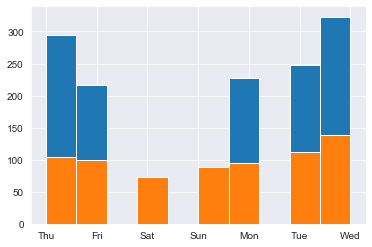

In [79]:
# relationship between 'day of week' and 'spam'
spam['day of week'].groupby(spam['spam']).hist()

spam
no     AxesSubplot(0.125,0.125;0.775x0.755)
yes    AxesSubplot(0.125,0.125;0.775x0.755)
Name: time of day, dtype: object

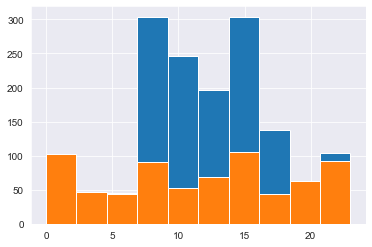

In [80]:
spam['time of day'].groupby(spam['spam']).hist()

spam
no     AxesSubplot(0.125,0.125;0.775x0.755)
yes    AxesSubplot(0.125,0.125;0.775x0.755)
Name: domain, dtype: object

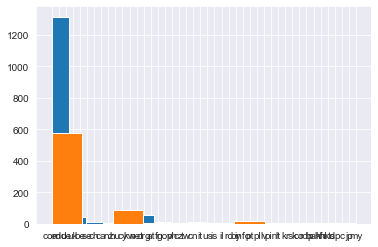

In [84]:
spam['domain'].groupby(spam['spam']).hist()

## Part 3

### a

In [3]:
spam['spampct'].isnull().sum()

1353

### b

Text(0, 0.5, 'percentage')

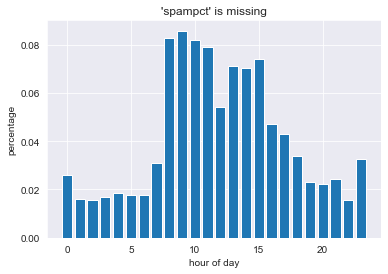

In [9]:
# 'time of day' when 'spampct' is missing
spam_pct_missing = spam['time of day'][spam['spampct'].isnull()]
values,counts=np.unique(np.array(spam_pct_missing),return_counts=True)

# plot the distribution
plt.bar(values,counts/np.sum(counts))
plt.title("'spampct' is missing")
plt.xlabel('hour of day')
plt.ylabel('percentage')

Text(0, 0.5, 'percentage')

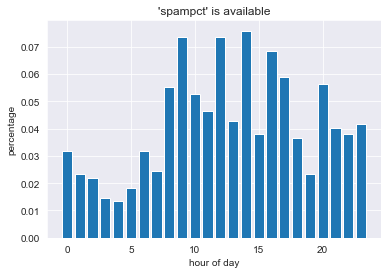

In [7]:
# 'time of day' when 'spampct' is available
spam_pct_available = spam['time of day'][spam['spampct'].notnull()]
new_values,new_counts=np.unique(np.array(spam_pct_available),return_counts=True)
plt.bar(new_values,new_counts/np.sum(new_counts))
plt.title("'spampct' is available")
plt.xlabel('hour of day')
plt.ylabel('percentage')

### c

Text(0, 0.5, 'spampct')

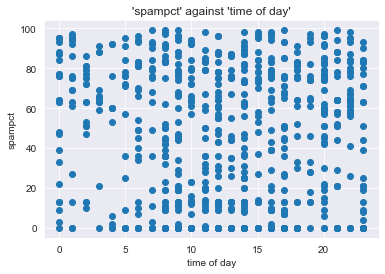

In [10]:
plt.scatter(spam['time of day'],spam['spampct'])
plt.title("'spampct' against 'time of day'")
plt.xlabel('time of day')
plt.ylabel('spampct')

In [12]:
all_points = np.array(list(zip(spam['time of day'],spam['spampct'])))
print("Number of unique points plotted: "+str(len(np.unique(all_points))))

Number of unique points plotted: 1451


# Question 3

## a

In [13]:
# feature vector, 'X'
np.random.seed(1)
X = np.random.normal(0, 1, 100)
X

array([ 1.62434536, -0.61175641, -0.52817175, -1.07296862,  0.86540763,
       -2.3015387 ,  1.74481176, -0.7612069 ,  0.3190391 , -0.24937038,
        1.46210794, -2.06014071, -0.3224172 , -0.38405435,  1.13376944,
       -1.09989127, -0.17242821, -0.87785842,  0.04221375,  0.58281521,
       -1.10061918,  1.14472371,  0.90159072,  0.50249434,  0.90085595,
       -0.68372786, -0.12289023, -0.93576943, -0.26788808,  0.53035547,
       -0.69166075, -0.39675353, -0.6871727 , -0.84520564, -0.67124613,
       -0.0126646 , -1.11731035,  0.2344157 ,  1.65980218,  0.74204416,
       -0.19183555, -0.88762896, -0.74715829,  1.6924546 ,  0.05080775,
       -0.63699565,  0.19091548,  2.10025514,  0.12015895,  0.61720311,
        0.30017032, -0.35224985, -1.1425182 , -0.34934272, -0.20889423,
        0.58662319,  0.83898341,  0.93110208,  0.28558733,  0.88514116,
       -0.75439794,  1.25286816,  0.51292982, -0.29809284,  0.48851815,
       -0.07557171,  1.13162939,  1.51981682,  2.18557541, -1.39

## b

In [14]:
# error vector, 'eps'
eps = np.random.normal(0, 0.25**0.5, 100)
eps

array([-0.22356428,  0.61225385,  0.20174582,  0.29678926, -0.54745592,
        0.08469122,  0.37027823, -0.4768503 , -0.13310925,  0.01630727,
       -0.68655866,  0.1575797 ,  0.42308032, -0.42975797,  0.17527299,
       -0.65614171, -0.01934775, -0.80788618,  0.56070885,  0.20445027,
       -0.01230848, -0.38758081,  0.63687797,  0.98355087, -0.92899093,
        0.61808202,  0.81382538,  0.16900585, -0.59963402,  0.43167266,
       -0.09046015, -0.30196031, -0.61502907,  0.27526875,  0.39640343,
       -0.31176536,  0.26028817, -0.57217069,  0.40093052,  0.02328365,
       -0.09328489, -0.05087294,  0.43444308,  0.37520582,  0.26473266,
        0.0688506 ,  0.03891056,  0.30919013,  0.11624728,  0.3412757 ,
       -0.15505839, -1.21741888,  0.5194123 ,  1.09348982,  0.22068222,
       -0.05007762, -0.06822237, -0.05952709,  0.0087047 , -0.56100936,
       -0.25854723, -0.49851341,  0.12439958, -0.14832058,  0.24760566,
       -0.08735158,  0.49316759,  0.10676695,  1.09534986, -0.94

## c

In [15]:
# linear model Y
Y = -1 + 0.5*X + eps
Y

array([-0.4113916 , -0.69362435, -1.06234006, -1.23969505, -1.11475211,
       -2.06607813,  0.24268411, -1.85745375, -0.9735897 , -1.10837791,
       -0.95550469, -1.87249066, -0.73812828, -1.62178515, -0.25784229,
       -2.20608734, -1.10556186, -2.24681539, -0.41818427, -0.50414212,
       -1.56261807, -0.81521895,  0.08767333,  0.23479804, -1.47856296,
       -0.72378191, -0.24761974, -1.29887887, -1.73357806, -0.30314961,
       -1.43629053, -1.50033708, -1.95861542, -1.14733407, -0.93921963,
       -1.31809766, -1.29836701, -1.45496285,  0.2308316 , -0.60569427,
       -1.18920266, -1.49468742, -0.93913607,  0.22143312, -0.70986346,
       -1.24964722, -0.86563169,  0.3593177 , -0.82367324, -0.35012274,
       -1.00497323, -2.39354381, -1.0518468 , -0.08118154, -0.88376489,
       -0.75676602, -0.64873067, -0.59397605, -0.84850163, -1.11843878,
       -1.6357462 , -0.87207934, -0.61913551, -1.29736699, -0.50813526,
       -1.12513744,  0.05898229, -0.13332464,  1.18813757, -2.64

In [16]:
len(Y)

100

## d

Text(0, 0.5, 'Y values')

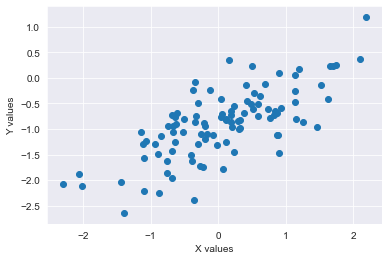

In [17]:
# Scatter plot
plt.scatter(X,Y)
plt.xlabel('X values')
plt.ylabel('Y values')

## e

In [18]:
# fit the least squares linear model
model = sm.OLS(Y,sm.add_constant(X))
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.522
Model:                            OLS   Adj. R-squared:                  0.517
Method:                 Least Squares   F-statistic:                     107.0
Date:                Thu, 01 Oct 2020   Prob (F-statistic):           2.20e-17
Time:                        18:21:20   Log-Likelihood:                -65.124
No. Observations:                 100   AIC:                             134.2
Df Residuals:                      98   BIC:                             139.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.9265      0.047    -19.717      0.000      -1.020      -0.833
x1             0.5477      0.053     10.342      0.000       0.443       0.653
==============================================================================
Omnibus:                        0.898   Durbin-Watson:                   2.157
Prob(Omnibus):                  0.638   Jarque-Bera (JB):                0.561
Skew:                          -0.172   Prob(JB):                        0.755
Kurtosis:                       3.127   Cond. No.                         1.15
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## f

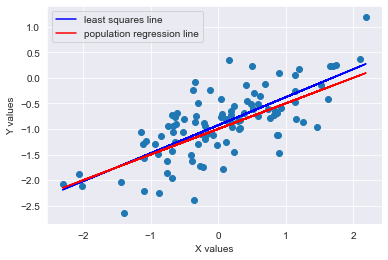

In [19]:
# plot regression lines
plt.scatter(X,Y)
plt.xlabel('X values')
plt.ylabel('Y values')
plt.plot(X,-0.9265+0.5477*X, c = 'blue', label = 'least squares line')   
# least squares regression line: Y = beta_hat_0 + beta_hat_1*X
plt.plot(X,-1 + 0.5*X, c = 'red', label = 'population regression line')          
# population regression line: Y = true_beta_0 + true_beta_1*X
plt.legend()

## g

In [20]:
# add a quadratic term
X_g = np.column_stack((X, X**2))
# New Model: y ~ x + x^2
new_model = sm.OLS(Y,sm.add_constant(X_g))
new_result = new_model.fit()
new_result.summary()
# the p-value of X^2 is too large, therefore insignificant

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.522
Model:                            OLS   Adj. R-squared:                  0.512
Method:                 Least Squares   F-statistic:                     52.96
Date:                Thu, 01 Oct 2020   Prob (F-statistic):           2.83e-16
Time:                        18:23:27   Log-Likelihood:                -65.107
No. Observations:                 100   AIC:                             136.2
Df Residuals:                      97   BIC:                             144.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.9325      0.058    -16.158      0.000      -1.047      -0.818
x1             0.5468      0.053     10.229      0.000       0.441       0.653
x2             0.0077      0.043      0.181      0.856      -0.077       0.092
==============================================================================
Omnibus:                        0.893   Durbin-Watson:                   2.152
Prob(Omnibus):                  0.640   Jarque-Bera (JB):                0.552
Skew:                          -0.170   Prob(JB):                        0.759
Kurtosis:                       3.132   Cond. No.                         2.10
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

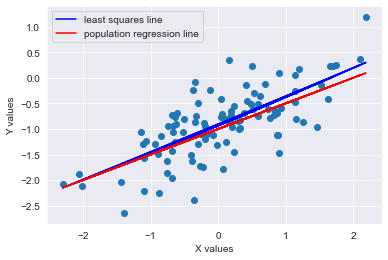

In [21]:
# plot regression lines
plt.scatter(X_g[:,0],Y)
plt.xlabel('X values')
plt.ylabel('Y values')
plt.plot(X_g[:,0],-0.9325+0.5468*X_g[:,0]+0.0077*X_g[:,0]**2, c = 'blue', label = 'least squares line')   
# least squares regression line: Y = beta_hat_0 + beta_hat_1*X + beta_hat_2*X^2
plt.plot(X_g[:,0],-1 + 0.5*X_g[:,0], c = 'red', label = 'population regression line')          
# population regression line: Y = true_beta_0 + true_beta_1*X
plt.legend()

## h

In [22]:
# Less noisy model
np.random.seed(1)
X_h = np.random.normal(0, 1, 100)
# Decrease the variance of the normal distribution of 'eps' to 
eps_h = np.random.normal(0, 0.05**0.5, 100)
Y_h = -1 + 0.5*X_h + eps_h

Text(0, 0.5, 'Y_h values')

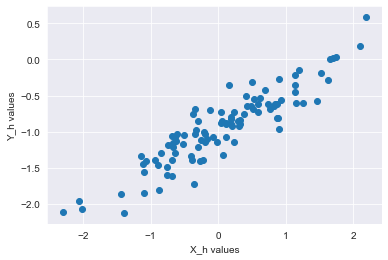

In [23]:
# scatter plot
plt.scatter(X_h,Y_h)
plt.xlabel('X_h values')
plt.ylabel('Y_h values')

In [24]:
# fit the model
model_h = sm.OLS(Y_h,sm.add_constant(X_h))
result_h = model_h.fit()
result_h.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     484.5
Date:                Thu, 01 Oct 2020   Prob (F-statistic):           1.04e-39
Time:                        18:25:44   Log-Likelihood:                 15.348
No. Observations:                 100   AIC:                            -26.70
Df Residuals:                      98   BIC:                            -21.49
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.9671      0.021    -46.023      0.000      -1.009      -0.925
x1             0.5213      0.024     22.011      0.000       0.474       0.568
==============================================================================
Omnibus:                        0.898   Durbin-Watson:                   2.157
Prob(Omnibus):                  0.638   Jarque-Bera (JB):                0.561
Skew:                          -0.172   Prob(JB):                        0.755
Kurtosis:                       3.127   Cond. No.                         1.15
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

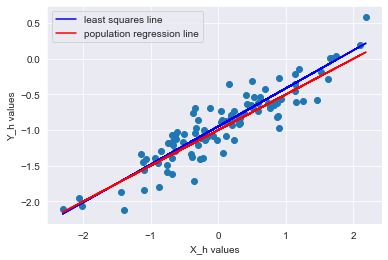

In [25]:
# plot regression lines
plt.scatter(X_h,Y_h)
plt.xlabel('X_h values')
plt.ylabel('Y_h values')
plt.plot(X_h,-0.9480+0.5337*X_h, c = 'blue', label = 'least squares line')   
# least squares regression line: Y = beta_hat_0 + beta_hat_1*X
plt.plot(X_h,-1 + 0.5*X_h, c = 'red', label = 'population regression line')          
# population regression line: Y = true_beta_0 + true_beta_1*X
plt.legend()

## i

In [26]:
# noisier model
np.random.seed(1)
X_i = np.random.normal(0, 1, 100)
# Increase the variance of the normal distribution of 'eps'
eps_i = np.random.normal(0, 0.75**0.5, 100)
Y_i = -1 + 0.5*X_i + eps_i

Text(0, 0.5, 'Y_i values')

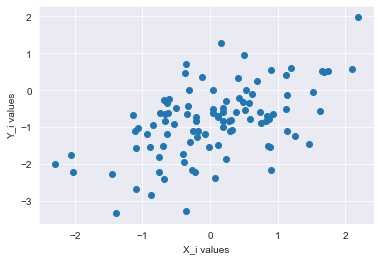

In [27]:
# scatter plot
plt.scatter(X_i,Y_i)
plt.xlabel('X_i values')
plt.ylabel('Y_i values')

In [28]:
# fit the model
model_i = sm.OLS(Y_i,sm.add_constant(X_i))
result_i = model_i.fit()
result_i.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.292
Model:                            OLS   Adj. R-squared:                  0.284
Method:                 Least Squares   F-statistic:                     40.34
Date:                Thu, 01 Oct 2020   Prob (F-statistic):           6.70e-09
Time:                        18:26:56   Log-Likelihood:                -120.05
No. Observations:                 100   AIC:                             244.1
Df Residuals:                      98   BIC:                             249.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.8727      0.081    -10.723      0.000      -1.034      -0.711
x1             0.5826      0.092      6.352      0.000       0.401       0.765
==============================================================================
Omnibus:                        0.898   Durbin-Watson:                   2.157
Prob(Omnibus):                  0.638   Jarque-Bera (JB):                0.561
Skew:                          -0.172   Prob(JB):                        0.755
Kurtosis:                       3.127   Cond. No.                         1.15
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

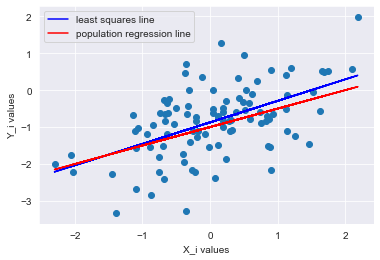

In [29]:
# plot regression lines
plt.scatter(X_i,Y_i)
plt.xlabel('X_i values')
plt.ylabel('Y_i values')
plt.plot(X_i,-0.8727+0.5826*X_i, c = 'blue', label = 'least squares line')   
# least squares regression line: Y = beta_hat_0 + beta_hat_1*X
plt.plot(X_i,-1 + 0.5*X_i, c = 'red', label = 'population regression line')          
# population regression line: Y = true_beta_0 + true_beta_1*X
plt.legend()

## j

In [30]:
# confidence intervals of coefficients for each model
print("Original Dataset:")
print("beta_0: " + str(result.conf_int()[0]) + " beta_1: " + str(result.conf_int()[1]))
print("Less Noisy Dataset:")
print("beta_0: " + str(result_h.conf_int()[0]) + " beta_1: " + str(result_h.conf_int()[1]))
print("Noisier Dataset:")
print("beta_0: " + str(result_i.conf_int()[0]) + " beta_1: " + str(result_i.conf_int()[1]))

Original Dataset:
beta_0: [-1.01974096 -0.83324551] beta_1: [0.44261338 0.65281376]
Less Noisy Dataset:
beta_0: [-1.00882843 -0.92542512] beta_1: [0.47433592 0.56834039]
Noisier Dataset:
beta_0: [-1.03419235 -0.71117274] beta_1: [0.40060345 0.76468119]


# Question 4

## Part 1 
## Fit the classifier and estimate generalization error.

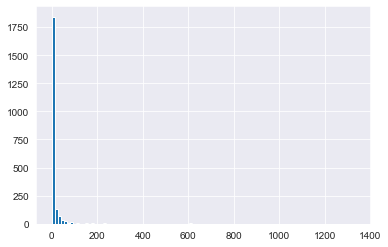

In [48]:
spam['size.kb'].hist(bins=100)

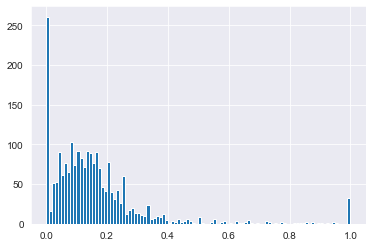

In [49]:
spam['cappct'].hist(bins=100)

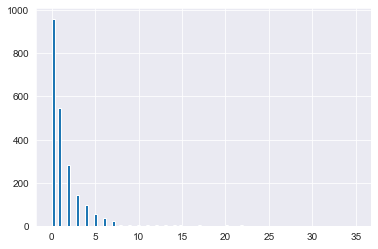

In [50]:
spam['special'].hist(bins=100)

#### None of the 3 continuous variables above follow the Gaussian Distribution. While the ranges are all very large, most values falls into a very small range on the left side. They are all too skewed to the same direction. Therefore, not quite useful when used as predictors in Naive Bayes classifier, using the Gaussian NB from 'sklearn' for these 3 continuous features.

In [51]:
# convert all categorical values into numerical values
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

day = le.fit_transform(spam['day of week'])
time = le.fit_transform(spam['time of day'])
box = le.fit_transform(spam['box'])
domain = le.fit_transform(spam['domain'])
local = le.fit_transform(spam['local'])
digits = le.fit_transform(spam['digits'])
name = le.fit_transform(spam['name'])
credit = le.fit_transform(spam['credit'])
sucker = le.fit_transform(spam['sucker'])
porn = le.fit_transform(spam['porn'])
chain = le.fit_transform(spam['chain'])
username = le.fit_transform(spam['username'])
large_text = le.fit_transform(spam['large text'])
category = le.fit_transform(spam['category'])

# zip all features into a list
features = list(zip(day,time,box,domain,local,digits,name,credit,sucker,porn,chain,username,large_text,category))

# put label in a list
label = list(le.fit_transform(spam['spam']))

In [53]:
# using only the categorical variables as features to build the classifier.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.2, random_state=0)
# Import Categorical NB classifier
from sklearn.naive_bayes import CategoricalNB
clf = CategoricalNB()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

# Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9379310344827586


## Part 2
## Repeat the 10 times randomly assigning the training & testing data set.

In [55]:
# 1nd
# reassign the training and testing set
X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.2, random_state=24)
clf = CategoricalNB()
y_pred = clf.fit(X_train, y_train).predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9425287356321839


In [57]:
# 2nd
# reassign the training and testing set
X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.2, random_state=2)
clf = CategoricalNB()
y_pred = clf.fit(X_train, y_train).predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9356321839080459


In [59]:
# 3rd
# reassign the training and testing set
X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.2, random_state=3)
clf = CategoricalNB()
y_pred = clf.fit(X_train, y_train).predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9563218390804598


In [61]:
# 4th
# reassign the training and testing set
X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.2, random_state=4)
clf = CategoricalNB()
y_pred = clf.fit(X_train, y_train).predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9632183908045977


In [64]:
# 5th
# reassign the training and testing set
X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.2, random_state=55)
clf = CategoricalNB()
y_pred = clf.fit(X_train, y_train).predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9563218390804598


In [65]:
# 6th
# reassign the training and testing set
X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.2, random_state=62)
clf = CategoricalNB()
y_pred = clf.fit(X_train, y_train).predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9448275862068966


In [66]:
# 7th
# reassign the training and testing set
X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.2, random_state=71)
clf = CategoricalNB()
y_pred = clf.fit(X_train, y_train).predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9471264367816092


In [67]:
# 8th
# reassign the training and testing set
X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.2, random_state=123)
clf = CategoricalNB()
y_pred = clf.fit(X_train, y_train).predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9425287356321839


In [68]:
# 9th
# reassign the training and testing set
X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.2, random_state=98)
clf = CategoricalNB()
y_pred = clf.fit(X_train, y_train).predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9655172413793104


In [69]:
# 10th
# reassign the training and testing set
X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.2, random_state=105)
clf = CategoricalNB()
y_pred = clf.fit(X_train, y_train).predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9471264367816092


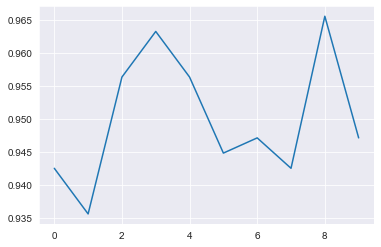

In [74]:
error_var = np.array([0.9425287356321839, 0.9356321839080459, 0.9563218390804598, 0.9632183908045977, 0.9563218390804598,
         0.9448275862068966, 0.9471264367816092, 0.9425287356321839, 0.9655172413793104, 0.9471264367816092])
plt.plot(error_var)

In [75]:
[error_var.min(), error_var.max()]

[0.9356321839080459, 0.9655172413793104]